# Entangling Two Remote Spins

In this notebook we look at a protocol to entangle two remote spins.

In [29]:
from qiskit import QuantumRegister, ClassicalRegister
from qiskit import QuantumCircuit, Aer, execute, BasicAer
from qiskit.tools.visualization import plot_histogram

import matplotlib.pyplot as plt
import numpy as np
from numpy import pi

Initialize the registers:

In [30]:
# Initialize Alice registers
q_alice_spin = QuantumRegister(1, 'q_alice_spin')
q_alice_photon = QuantumRegister(1, 'q_alice_photon')
c_alice_spin = ClassicalRegister(1, 'c_alice_spin')
c_alice_photon = ClassicalRegister(1, 'c_alice_photon')

# Build Alices Quantum Circuit
qc_alice = QuantumCircuit(q_alice_spin, q_alice_photon, c_alice_spin, c_alice_photon)

# Initialize Bob registers
q_bob_spin = QuantumRegister(1, 'q_bob_spin')
q_bob_photon = QuantumRegister(1, 'q_bob_photon')
c_bob_spin = ClassicalRegister(1, 'c_bob_spin')
c_bob_photon = ClassicalRegister(1, 'c_bob_photon')

# Build Bobs Quantum Circuit
qc_bob = QuantumCircuit(q_bob_spin, q_bob_photon, c_bob_spin, c_bob_photon)

Perform the operations:

In [31]:
# Alices Opertaions
qc_alice.h(q_alice_spin[0])
qc_alice.cx(q_alice_spin[0], q_alice_photon[0])

# Bobs Operations
qc_bob.h(q_bob_spin[0])
qc_bob.cx(q_bob_spin[0], q_bob_photon[0])

  

# CX between photons
qc.cx(q_bob_photon[0], q_alice_photon[0])
# Hadmard Alices photon
qc.h(q_bob_photon[0])

#
qc.barrier()
qc.draw()

Make measurements:

In [32]:
qc.measure(q_alice_spin[0], c_alice_spin[0])
qc.measure(q_alice_photon[0], c_alice_photon[0])
qc.measure(q_bob_spin[0], c_bob_spin[0])
qc.measure(q_bob_photon[0], c_bob_photon[0])

qc.draw()

Lets look at the counts:

{'1 1 1 0': 125, '0 1 0 1': 128, '1 0 0 0': 126, '0 0 1 1': 112, '1 0 1 1': 124, '0 1 1 0': 134, '1 1 0 1': 150, '0 0 0 0': 125}


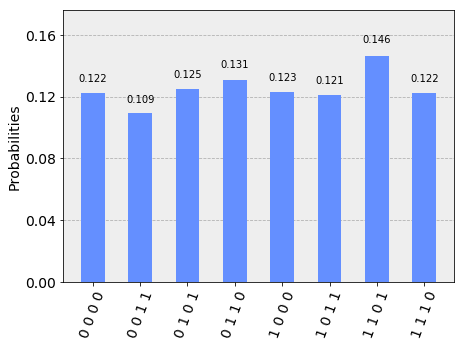

In [33]:
# Load backend QasmSimulator and run the job
backend = BasicAer.get_backend('qasm_simulator')

# select the number of shots (repeats) of the experiment, and run the job

job = execute(qc, backend, shots=1024)
result = job.result()

# get the counts (how many events in each bin)
counts = result.get_counts(qc)
print(counts)

# plot
plot_histogram(counts)

Basis goes {Bobs Photon, Bobs Spin, Alices Photon, Alices Spin}